# VS associations with cognitive performance (P) with an interaction with DRD2 polymorphism

***

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import ptitprince as pt
import pandas as pd
import numpy as np
import random
from scipy import stats
from scipy.stats import beta
from scipy.special import betaln
#from statsmodels.compat import unicode
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from IPython.core.display import HTML
#import pymc3 as pm
import math
from sklearn.utils import resample
from resample.bootstrap import bootstrap
# import dataframe_image as dfi 
# ^ TRY To FIX!

### Loading Datasets

In [114]:
# Loading data
data = pd.read_csv('DRD2_subset_data.csv', delimiter=',')
data = data.dropna(subset=['P','Q','VS','DRD2', 'AGE', 'female_1'])

# Loading second IGT only data (Reformatted)
IGT_data = pd.read_csv('DRD2_IGT_subset_data.csv', delimiter=',')
IGT_data = IGT_data.dropna(subset=['IGT_scores', 'DRD2'])

### Reformatting Data

In [119]:
# Changing Categorical data to integers
data['DRD2'] = data['DRD2'].astype(int)
data['female_1'] = data['female_1'].astype(int)
IGT_data['DRD2'] = IGT_data['DRD2'].astype(int)

# Changing DRD2 data to category type
data['DRD2_cat'] = pd.cut(data['DRD2'], range(-1,2,1), labels=['Non-Carrier', '-141C II or ID Carrier'])
data['DRD2_cat'] = data['DRD2_cat'].astype('object')
IGT_data['DRD2_cat'] = pd.cut(IGT_data['DRD2'], range(-1,2,1), labels=['Non-Carrier', '-141C ID or DD Carrier'])
IGT_data['DRD2_cat'] = IGT_data['DRD2_cat'].astype('object')

# Splitting data based on DRD2 polymorphism
carrier = data[data['DRD2'] == 1] # Low D2 Receptors
noncarrier = data[data['DRD2'] == 0] # Normal D2 Receptors

### Creating new Datasets

In [120]:
gene_data = pd.read_csv('DRD2_genetic_data.csv', delimiter=',')
new_data = data.merge(gene_data, on='LABID')
new_data.to_csv("DRD2_complete_data.csv", index=False)

new_data['DRD2_DD'] = np.where(new_data["DRD2_ORG"] == 'DD', 1, 0)
new_data['DRD2_ID'] = np.where(new_data["DRD2_ORG"] == 'ID', 1, 0)
new_data['DRD2_II'] = np.where(new_data["DRD2_ORG"] == 'II', 1, 0)

white_data = new_data[new_data["GEN_RACE"]==1]
black_data = new_data[new_data["GEN_RACE"]==2]

## Distribution Plots Version 1

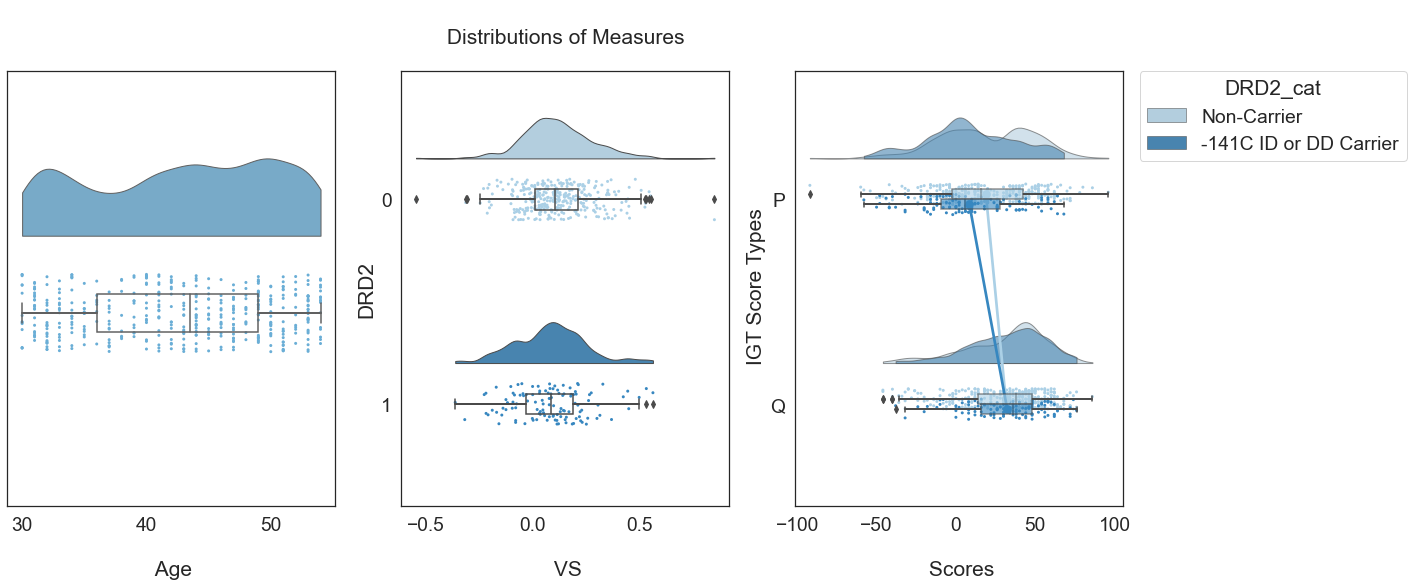

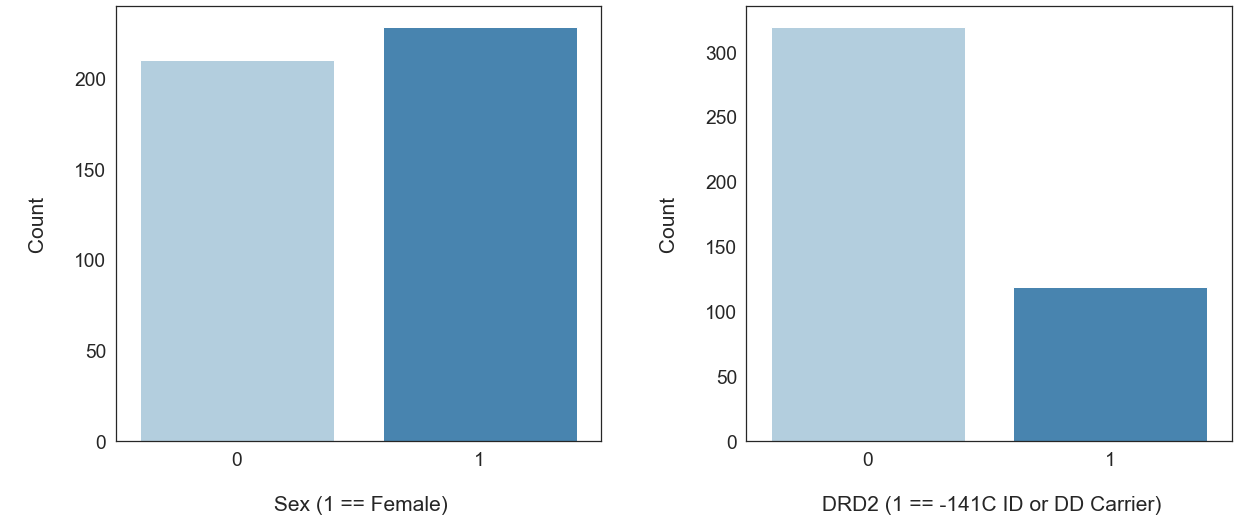

In [121]:
# Setting style of figures
sns.set_context("notebook", font_scale=1.75)

# Configuring 1st row of grid of plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.2)
fig.set_figheight(8)
fig.set_figwidth(20)


# Age Rain Cloud Plot
ax = fig.add_subplot(1, 3, 1)
age = pt.RainCloud(y='AGE', orient='h',data=data, width_viol=.4, width_box=.1, 
                   palette="Blues",ax=ax)
age.set(xlabel='\n Age')

# VS Rain Cloud Plot
ax = fig.add_subplot(1, 3, 2)
VS = pt.RainCloud(y='VS', x='DRD2', data=data, orient='h', width_viol=.4, width_box=.1, 
                  palette="Blues", ax=ax)
VS.set(xlabel='\n VS', title='\n Distributions of Measures \n')

# IGT Scores Rain Cloud Plots
ax = fig.add_subplot(1, 3, 3)
IGT = pt.RainCloud(y='IGT_scores', x='IGT_score_type', hue='DRD2_cat', data=IGT_data, orient='h', 
                         width_viol=.4, width_box=.1, palette='Blues', alpha=.6, ax=ax,
                          dodge=True, pointplot=True) #Can comment out if lines aren't helpful
IGT.set(xlabel='\n Scores', ylabel='\n IGT Score Types')

fig.savefig('Tables&Figures/DistributionPlots1.png')

# Configuring 2nd row of grid of plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=.3)
fig.set_figheight(8)
fig.set_figwidth(20)

# Sex Bar Plot
ax = fig.add_subplot(1, 2, 1)
sex = sns.countplot(x="female_1", data=data, palette="Blues", ax=ax)
ax.set(xlabel='\n Sex (1 == Female)', ylabel='\n Count \n')

# DRD2 Bar Plot
ax = fig.add_subplot(1, 2, 2)
DRD2 = sns.countplot(x="DRD2", data=data, palette="Blues", ax=ax)
ax.set(xlabel='\n DRD2 (1 == -141C ID or DD Carrier)', ylabel='\n Count \n')

plt.close(3)
plt.close(4)

fig.savefig('Tables&Figures/DistributionPlots2.png')
plt.show()

## Distribution Plots Version 2

<Figure size 432x288 with 0 Axes>

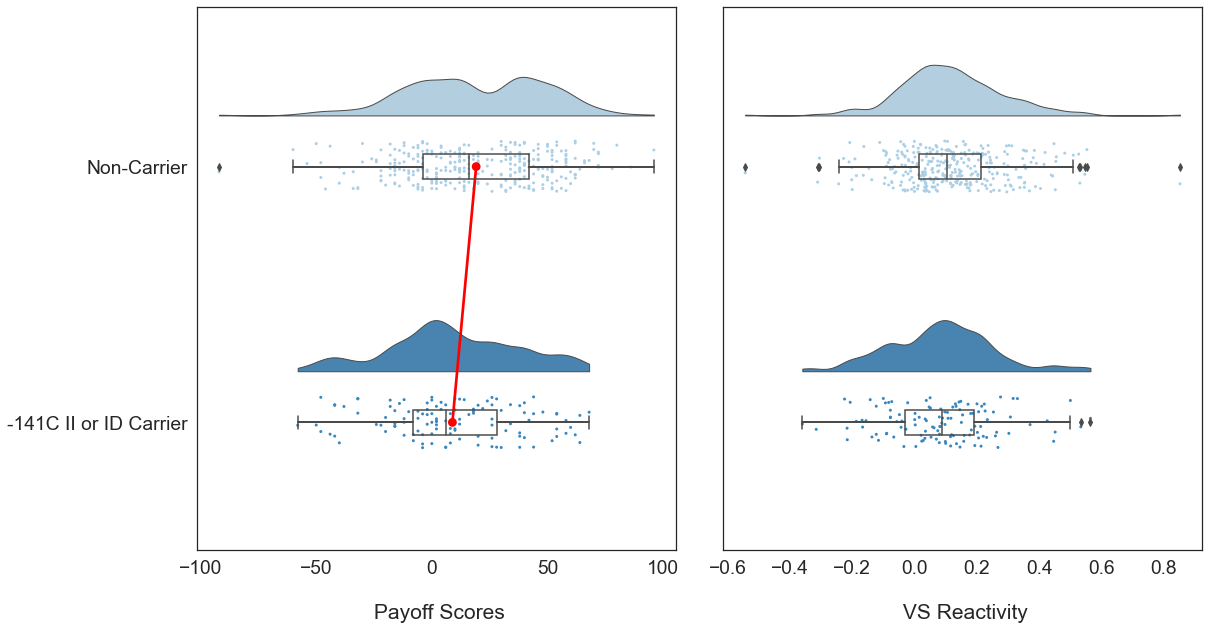

In [126]:
# Setting style of figures
sns.set_context("notebook", font_scale=1.75)

# Configuring 1st row of grid of plots
fig = plt.figure()
fig, axs = plt.subplots(1,2, figsize=(18,10), sharey=True)
fig.subplots_adjust(hspace=0.6, wspace=0.1)
axs= axs.ravel()

# IGT Scores Rain Cloud Plots
IGT = pt.RainCloud(y='P', x='DRD2_cat', data=data, orient='h', width_viol=.4, width_box=.1, 
                   palette='Blues', pointplot=True, ax=axs[0])
IGT.set(xlabel='\n Payoff Scores', ylabel='')

# VS Rain Cloud Plot
VS = pt.RainCloud(y='VS', x='DRD2_cat', data=data, orient='h', width_viol=.4, width_box=.1, 
                  palette="Blues", ax=axs[1])
VS.set(xlabel='\n VS Reactivity', ylabel='')


#ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
#plt.legend([], ["Attr A", "Attr A+B"])

fig.savefig('Tables&Figures/DistributionPlots3.png', bbox_inches='tight')
plt.show()

In [6]:
data[data["DRD2_cat"] == "Non-Carrier"].mean()

AGE              42.655172
female_1          0.514107
P                19.159875
Q                31.216301
VS                0.116175
Obesity          -0.062569
DRD2              0.000000
IGT_scores       19.159875
LABID         44850.592476
dtype: float64

In [7]:
data[data["DRD2_cat"] == "-141C Ins/Del Carrier"].mean()

AGE              42.697479
female_1          0.537815
P                 8.890756
Q                32.689076
VS                0.084493
Obesity           0.152659
DRD2              1.000000
IGT_scores        8.890756
LABID         44774.647059
dtype: float64

***


# New genetic controls and analyses


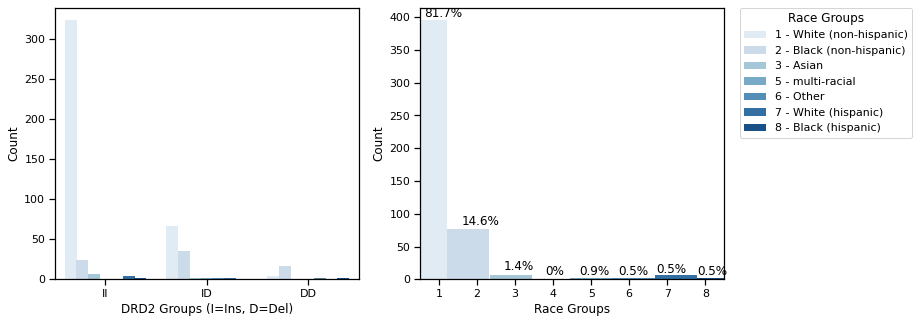

In [5]:
# Setting style of figures
sns.set_context("notebook", font_scale=1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.2)
fig.set_figheight(5)
fig.set_figwidth(12)


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

ax = fig.add_subplot(1, 2, 1)
plot1 = sns.countplot(x="DRD2_ORG", hue ="GEN_RACE", data=gene_data, palette="Blues")
plot1.set(ylabel="Count", xlabel="DRD2 Groups (I=Ins, D=Del)")
plt.legend().remove()
change_width(ax, 0.12)

ax = fig.add_subplot(1, 2, 2)
plot2 = sns.countplot(x="GEN_RACE", hue ="GEN_RACE", data=gene_data, palette="Blues", order=list(range(1, 9)))
plot2.set(ylabel="Count", xlabel="Race Groups")
plt.legend(title="Race Groups", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0,
          labels=["1 - White (non-hispanic)", 
                  "2 - Black (non-hispanic)", 
                  "3 - Asian",  
                  "5 - multi-racial", 
                  "6 - Other", 
                  "7 - White (hispanic)", 
                  "8 - Black (hispanic)"])
# legend not including 4 - Native American, because zero-value

ax.annotate(text='81.7%', xy=(-0.4, 400))
ax.annotate(text='14.6%', xy=(0.6, 83))
ax.annotate(text='1.4%', xy=(1.7, 15))
ax.annotate(text='0%', xy=(2.8, 6))
ax.annotate(text='0.9%', xy=(3.7, 6))
ax.annotate(text='0.5%', xy=(4.7, 6))
ax.annotate(text='0.5%', xy=(5.7, 10))
ax.annotate(text='0.5%', xy=(6.8, 6))
change_width(ax, 1.11)

fig.savefig('Tables&Figures/RaceDistributionPlots.png', bbox_inches='tight')

In [103]:
new_data["GEN_RACE"].value_counts() #438 total

1    358
2     64
7      6
3      4
8      2
6      2
5      2
Name: GEN_RACE, dtype: int64

In [8]:
vals = new_data[["GEN_RACE", "DRD2_ORG"]].value_counts().reset_index(name="count")
table = vals[0:].fillna(0)
df3 = pd.DataFrame({'GEN_RACE': [3, 3, 4, 4, 4, 5, 5, 6, 7, 8], 
                    'DRD2_ORG': ['ID', 'DD', 'II', "ID", "DD", "II", "DD", "II", "DD", "ID"], 
                    'count': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]})
race_col = {'GEN_RACE': {1: "1 - White (non-hispanic)", 
                         2: "2 - Black (non-hispanic)",
                         3: "3 - Asian",  
                         4: "4 - Native American",
                         5: "5 - multi-racial", 
                         6: "6 - Other", 
                         7: "7 - White (hispanic)", 
                         8: "8 - Black (hispanic)"}}
df = pd.concat([table, df3], ignore_index = True, axis=0)
df = df.replace(to_replace=race_col)
df = df.sort_values(["GEN_RACE", "DRD2_ORG"], ascending=[True, False])
df = df.pivot(index='GEN_RACE', columns='DRD2_ORG', values='count')
df = df.reindex(columns=["II", "ID", "DD"])
df.columns.name = None
df.index.name = None
df.loc['Total'] = df.sum() # sum for columns
df.loc[:, 'Total'] = df.sum(axis=1) # sum for rows
#df = df.style.background_gradient()
df

,II,ID,DD,Total
1 - White (non-hispanic),291,63,4,358
2 - Black (non-hispanic),19,29,16,64
3 - Asian,4,0,0,4
4 - Native American,0,0,0,0
5 - multi-racial,0,2,0,2
6 - Other,0,1,1,2
7 - White (hispanic),4,2,0,6
8 - Black (hispanic),1,0,1,2
Total,319,97,22,438


#### Hardy-Weinberg Equilibrium equations:
<br />
    p + q = 1 

<br />
    p<sup>2</sup> + 2pq + q<sup>2</sup> = 1

In [16]:
II = new_data["DRD2_ORG"].value_counts()[2] # homozygous recessive
ID = new_data["DRD2_ORG"].value_counts()[1] # heterzygous
DD = new_data["DRD2_ORG"].value_counts()[0] # homozygous dominant

p_alleles = ()

319

In [3]:
p_allele = (22*2)+97 # dominant allele: D
q_allele = (319*2)+97 # recessive allele: I

total_allele = p_allele + q_allele

p = p_allele/total_allele
q = q_allele/total_allele
sum_1 = p+q
sum_2 = (p*p) + (2*p*q) + (q*q)

pp_data = ((22)/(319+22+97))
qq_data = ((319)/(319+22+97))
pq2_data = 2*((97)/(319+22+97))
sum_data = pp_data + pq2_data + qq_data


print(f"p={p_allele}, q={q_allele}, total={total_allele}")

print(f"p={p}, q={q}", f"p+q={sum_1}")

print(f"p2={p*p}, 2pq={2*p*q}, q2={q*q}", f"sum={sum_2}")

print(f"data: p2={pp_data}, 2pq={pq2_data}, q2={qq_data}", f"sum={sum_data}")



p=141, q=735, total=876
p=0.16095890410958905, q=0.839041095890411 p+q=1.0
p2=0.025907768812159882, 2pq=0.27010227059485836, q2=0.7039899605929818 sum=1.0
data: p2=0.0502283105022831, 2pq=0.4429223744292237, q2=0.728310502283105 sum=1.221461187214612


In [4]:
#perform Chi-Square Goodness of Fit Test

obs_p2 = p*p
exp_p2 = pp_data

obs_2pq = 2*p*q
exp_2pq = pq2_data

obs_q2 = q*q
exp_q2 = qq_data

stats.chisquare(f_obs=obs_p2, f_exp=exp_p2)

Power_divergenceResult(statistic=0.0008121381556998345, pvalue=nan)

In [5]:
stats.chisquare(f_obs=obs_2pq, f_exp=exp_2pq)

Power_divergenceResult(statistic=0.06743120242640474, pvalue=nan)

In [6]:
stats.chisquare(f_obs=obs_q2, f_exp=exp_q2)

Power_divergenceResult(statistic=0.0008121381556998345, pvalue=nan)

***


# T-Tests

### T-Test between DRD2 vs P and Q

In [22]:
t_test_results = stats.ttest_ind(carrier.iloc[:,2:5], noncarrier.iloc[:,2:5], equal_var=True)
cols = ['P', 'Q', 'VS']
pd.DataFrame({'Statistics':t_test_results.statistic[0:], 'P-values':t_test_results.pvalue}, cols)


,Statistics,P-values
P,-3.230837,0.001328
Q,0.539049,0.590128
VS,-1.771730,0.077138


In [9]:
df = len(carrier.iloc[:,2:5]) + len(noncarrier.iloc[:,2:5]) - 2
df

436

In [27]:
t_test_results

Ttest_indResult(statistic=array([-3.23083657,  0.53904942, -1.77172964]), pvalue=array([0.00132777, 0.59012789, 0.07713785]))

### Linear Regression Plots

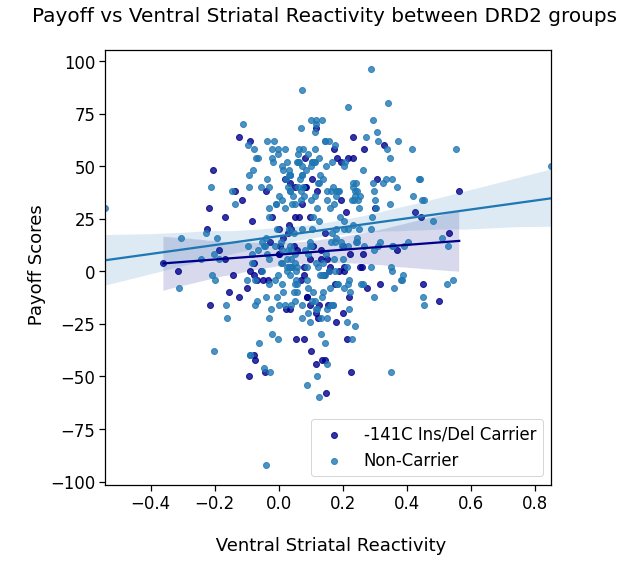

In [7]:
# Setting style of figures
sns.set_context("notebook", font_scale=1.5)

# Configuring plot
fig = plt.figure(figsize=(8,8))

# P vs VS between DRD2 groups Scatter Plot
scatter_P_low = sns.regplot(x='VS', y='P', data=carrier, label='-141C Ins/Del or Del/Del Carrier', color="darkblue").legend()
scatter_P_normal = sns.regplot(x='VS', y='P', data=noncarrier, label='Non-Carrier').legend()
plt.title('Payoff vs Ventral Striatal Reactivity between DRD2 groups \n', fontsize=20)
plt.ylabel('\n Payoff Scores')
plt.xlabel('\n Ventral Striatal Reactivity')

plt.show()

*****


# Linear Regression and Bootstrapped Bayes Factor

---


BIC Model Comparison
* model with the lowest BIC is considered best
* a difference in BICs between the two models is 0–2 constitutes ‘weak’ evidence in favor of the model with the smaller BIC; 
* a difference in BICs between 2 and 6 constitutes ‘positive’ evidence; 
* a difference in BICs between 6 and 10 constitutes ‘strong’ evidence; 
* a difference in BICs greater than 10 constitutes ‘very strong’ evidence in favor of the model with smaller BIC

* if adding an additional variable lowers the BIC, this suggests the benefits of enhanced explanatory power outweigh the cost of increasing model complexity (BIC has a preference for simpler models, because of the model complexity penalty d*log(N), N=number of parameters)

BIC = -2 * loglikelihood + d*log(N)

---


![Raftery, 1995 Grades of Evidence Table](Raftery_BIC_grades_of_evidence.png "Grades of Evidence Table")

Raftery, 1995 - Grades of Evidence Table

|                                             | BIC | Num. of Obs. |
|:-------------------------------------------:|:---:|:-----:|
|P ~ DRD2 + VS    | 4222 | 438 |
|P ~ DRD2 + VS + DRD2 * VS + AGE + female_1   | 4224 | 438 |
|P ~ DRD2 + VS + DRD2 * VS   | 4228 | 438 |
|P ~ DRD2_CODED + VS + DRD2_CODED * VS + AGE + female_1 + GEN_RACE   | 4220 | 438 |
|P ~ DRD2_CODED + VS + DRD2_CODED * VS   | 4227 | 438 |
||||
|Only **"White"** P ~ DRD2_CODED + VS + DRD2_CODED * VS + AGE + female_1   | 3437 | 358 |
|Only **"White"** P ~ DRD2_CODED + VS + DRD2_CODED * VS   | 3441 | 358 |
|Only **"White"** P ~ DRD2 + VS + DRD2 * VS + AGE + female_1   | 3438 | 358 |
|Only **"White"** P ~ DRD2 + VS + DRD2 * VS   | 3442 |  358|
||||
|Only **"Black"** P ~ DRD2_CODED + VS + DRD2_CODED * VS + AGE + female_1   | 639.1 | 64 |
|Only **"Black"** P ~ DRD2_CODED + VS + DRD2_CODED * VS   | 631.4 | 64 |
|Only **"Black"** P ~ DRD2 + VS + DRD2 * VS + AGE + female_1   | 639.2 | 64 |
|Only **"Black"** P ~ DRD2 + VS + DRD2 * VS   | 631.4 | 64 |

## Power Analysis - Monte Carlo Simulations

In [ ]:
# results of all simulations
all_stats = []

# loop through multiple simulations
for i in range(num_simulations):
    
    # choose random inputs for t

## Bootstrap Function

In [18]:
def resample(n):
    return (np.random.randint(low = 0, high = n, size = n))

def my_bootstrap(boot_pop, statistic, replicates = 10000):
    n = len(boot_pop)
    resample_estimates = np.array([statistic(boot_pop[resample(n)]) for _ in range(replicates)])
    return resample_estimates

## P ~ DRD2 + VS + DRD2 * VS + AGE + female_1 + GEN_RACE

In [6]:
results_P_controlled = smf.ols(formula='P ~ DRD2 + VS + DRD2 * VS + AGE + female_1 + GEN_RACE', data=new_data).fit()
HTML(results_P_controlled.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,37.4233,8.265,4.528,0.000,21.179,53.667
DRD2,-6.9624,3.599,-1.934,0.054,-14.036,0.112
VS,20.6858,9.782,2.115,0.035,1.459,39.913
DRD2:VS,-0.8480,18.424,-0.046,0.963,-37.059,35.363
AGE,-0.2454,0.189,-1.297,0.195,-0.617,0.127
female_1,-9.1789,2.783,-3.298,0.001,-14.649,-3.709
GEN_RACE,-4.6360,1.433,-3.235,0.001,-7.453,-1.819


In [7]:
HTML(results_P_controlled.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.090
Model:,OLS,Adj. R-squared:,0.077
Method:,Least Squares,F-statistic:,7.114
Date:,"Thu, 10 Feb 2022",Prob (F-statistic):,3.05e-07
Time:,15:57:53,Log-Likelihood:,-2088.7
No. Observations:,438,AIC:,4191.
Df Residuals:,431,BIC:,4220.
Df Model:,6,,
Covariance Type:,nonrobust,,


## P ~ DRD2 + VS + DRD2 * VS 

In [13]:
results_P_alt = smf.ols(formula='P ~ DRD2 + VS + DRD2 * VS', data=data).fit()$
HTML(results_P_alt.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,16.7039,2.020,8.269,0.000,12.733,20.674
DRD2,-8.7905,3.634,-2.419,0.016,-15.932,-1.649
VS,21.1400,10.020,2.110,0.035,1.447,40.833
DRD2:VS,-9.5730,18.830,-0.508,0.611,-46.582,27.436


In [14]:
results_P_alt.summary2().tables[1].to_csv('results_P_alt.csv')
results_P_alt.summary2().tables[0].to_csv('results_P_alt_stat.csv')

In [15]:
HTML(results_P_alt.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.034
Model:,OLS,Adj. R-squared:,0.028
Method:,Least Squares,F-statistic:,5.162
Date:,"Thu, 24 Jun 2021",Prob (F-statistic):,0.00163
Time:,17:18:34,Log-Likelihood:,-2101.7
No. Observations:,438,AIC:,4211.
Df Residuals:,434,BIC:,4228.
Df Model:,3,,
Covariance Type:,nonrobust,,


## P ~ DRD2_II + DRD2_ID + DRD2_DD + VS + DRD2_II*VS + DRD2_ID*VS + DRD2_DD*VS + AGE + female_1 + GEN_RACE

In [96]:
new_results_P_coded_controlled = smf.ols(formula='P ~ DRD2_II + DRD2_ID + DRD2_DD + VS + DRD2_II*VS + DRD2_ID*VS + DRD2_DD*VS + AGE + female_1 + GEN_RACE', 
                                   data=new_data).fit()
HTML(new_results_P_coded_controlled.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,23.7212,6.532,3.631,0.000,10.882,36.561
DRD2_II,13.5741,3.252,4.175,0.000,7.183,19.965
DRD2_ID,7.1887,3.651,1.969,0.050,0.012,14.365
DRD2_DD,2.9585,6.469,0.457,0.648,-9.756,15.673
VS,17.5264,9.274,1.890,0.059,-0.702,35.755
DRD2_II:VS,3.1692,11.554,0.274,0.784,-19.541,25.880
DRD2_ID:VS,-1.8807,16.174,-0.116,0.907,-33.671,29.910
DRD2_DD:VS,16.2380,23.371,0.695,0.488,-29.698,62.174
AGE,-0.2447,0.190,-1.290,0.198,-0.618,0.128
female_1,-9.0776,2.795,-3.247,0.001,-14.572,-3.583


In [97]:
HTML(new_results_P_coded_controlled.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.091
Model:,OLS,Adj. R-squared:,0.074
Method:,Least Squares,F-statistic:,5.355
Date:,"Mon, 07 Feb 2022",Prob (F-statistic):,1.99e-06
Time:,17:21:40,Log-Likelihood:,-2088.5
No. Observations:,438,AIC:,4195.
Df Residuals:,429,BIC:,4232.
Df Model:,8,,
Covariance Type:,nonrobust,,


# Main Effects Model
## P ~ DRD2_II + DRD2_ID + DRD2_DD + VS + DRD2_II*VS + DRD2_ID*VS + DRD2_DD*VS

In [10]:
new_results_P_main_effects_coded = smf.ols(formula='P ~ DRD2_II + DRD2_ID + DRD2_DD + VS', 
                                   data=new_data).fit()
HTML(new_results_P_main_effects_coded.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7244,1.932,3.480,0.001,2.926,10.522
DRD2_II,10.1791,2.150,4.735,0.000,5.953,14.405
DRD2_ID,1.8469,2.774,0.666,0.506,-3.606,7.299
DRD2_DD,-5.3016,4.830,-1.098,0.273,-14.795,4.192
VS,19.4223,8.531,2.277,0.023,2.654,36.190


In [11]:
HTML(new_results_P_main_effects_coded.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.036
Model:,OLS,Adj. R-squared:,0.030
Method:,Least Squares,F-statistic:,5.433
Date:,"Thu, 10 Feb 2022",Prob (F-statistic):,0.00112
Time:,18:18:15,Log-Likelihood:,-2101.3
No. Observations:,438,AIC:,4211.
Df Residuals:,434,BIC:,4227.
Df Model:,3,,
Covariance Type:,nonrobust,,


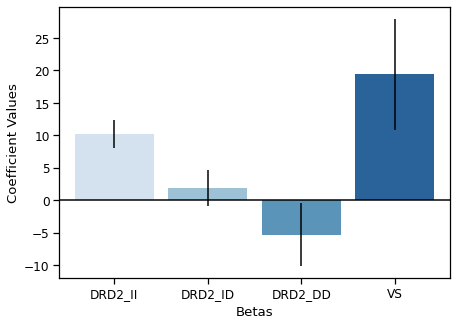

In [12]:
beta_df = pd.DataFrame({"coef_vals": new_results_P_main_effects_coded.params[1:]})
ci_df = new_results_P_main_effects_coded.conf_int(cols=None)[1:]
se_df = pd.DataFrame({"se_vals":new_results_P_main_effects_coded.bse[1:]})
beta_df = pd.merge(beta_df, ci_df, left_index=True, right_index=True, how='outer')
beta_df = pd.merge(beta_df, se_df, left_index=True, right_index=True, how='outer')
beta_df = beta_df.reset_index()
beta_df = beta_df.rename(columns={"index":"Betas", "coef_vals":"Coef Vals", 0:"0.025 CI", 1:"0.975 CI", "se_vals": "Std. Error"})

# Setting style of figures
sns.set_context("notebook", font_scale=1.1)

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

plot1 = sns.barplot(x = "Betas", 
                    y = "Coef Vals",
                    data = beta_df,
                    palette="Blues")

# include these to use confidence intervals as yerr = [lower, upper]
lower = beta_df["Coef Vals"] - beta_df["0.025 CI"]
upper = beta_df["0.975 CI"] - beta_df["Coef Vals"]

plot1.errorbar(x = beta_df["Betas"], 
               y = beta_df["Coef Vals"],
               yerr = beta_df["Std. Error"], # using Standard Error
               fmt = 'none', c = 'black')

plot1.axhline(0, color = "black")
plot1.set(ylabel = "Coefficient Values", xlabel = "Betas")
change_width(plot1, 0.85)

fig.savefig('Tables&Figures/MainEffectBetaCoefPlot.png', bbox_inches='tight')


## P ~ DRD2_II + DRD2_ID + DRD2_DD + VS + DRD2_II*VS + DRD2_ID*VS + DRD2_DD*VS

In [92]:
new_results_P_coded = smf.ols(formula='P ~ DRD2_II + DRD2_ID + DRD2_DD + VS + DRD2_II*VS + DRD2_ID*VS + DRD2_DD*VS', 
                                   data=new_data).fit()
HTML(new_results_P_coded.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.4018,2.227,2.875,0.004,2.026,10.778
DRD2_II,10.3021,2.646,3.893,0.000,5.101,15.503
DRD2_ID,2.8795,3.206,0.898,0.370,-3.422,9.181
DRD2_DD,-6.7799,6.103,-1.111,0.267,-18.776,5.216
VS,15.1547,9.474,1.600,0.110,-3.465,33.775
DRD2_II:VS,5.9853,11.834,0.506,0.613,-17.273,29.244
DRD2_ID:VS,-6.2994,16.555,-0.381,0.704,-38.837,26.239
DRD2_DD:VS,15.4687,23.940,0.646,0.519,-31.585,62.523


In [93]:
HTML(new_results_P_coded.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.037
Model:,OLS,Adj. R-squared:,0.026
Method:,Least Squares,F-statistic:,3.341
Date:,"Mon, 07 Feb 2022",Prob (F-statistic):,0.00568
Time:,17:16:41,Log-Likelihood:,-2101.1
No. Observations:,438,AIC:,4214.
Df Residuals:,432,BIC:,4239.
Df Model:,5,,
Covariance Type:,nonrobust,,


## Only "White"
## P ~ DRD2_II + DRD2_ID + DRD2_DD + VS + DRD2_II*VS + DRD2_ID*VS + DRD2_DD*VS + AGE + female_1

In [6]:
new_results_P_coded_controlled_white = smf.ols(formula='P ~ DRD2_II + DRD2_ID + DRD2_DD + VS + DRD2_II*VS + DRD2_ID*VS + DRD2_DD*VS + AGE + female_1', 
                                   data=white_data).fit()
HTML(new_results_P_coded_controlled_white.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,20.5566,7.504,2.739,0.006,5.798,35.315
DRD2_II,15.9812,5.212,3.066,0.002,5.731,26.231
DRD2_ID,9.8669,5.599,1.762,0.079,-1.145,20.879
DRD2_DD,-5.2915,12.704,-0.417,0.677,-30.277,19.694
VS,46.0426,24.972,1.844,0.066,-3.071,95.156
DRD2_II:VS,-26.9827,25.949,-1.040,0.299,-78.019,24.054
DRD2_ID:VS,-27.2316,30.850,-0.883,0.378,-87.906,33.443
DRD2_DD:VS,100.2569,72.417,1.384,0.167,-42.170,242.684
AGE,-0.2953,0.205,-1.439,0.151,-0.699,0.108
female_1,-10.4889,3.027,-3.465,0.001,-16.443,-4.535


In [7]:
HTML(new_results_P_coded_controlled_white.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.068
Model:,OLS,Adj. R-squared:,0.050
Method:,Least Squares,F-statistic:,3.659
Date:,"Wed, 09 Feb 2022",Prob (F-statistic):,0.000791
Time:,15:19:02,Log-Likelihood:,-1700.3
No. Observations:,358,AIC:,3417.
Df Residuals:,350,BIC:,3448.
Df Model:,7,,
Covariance Type:,nonrobust,,


## Only "White"
## P ~ DRD2_CODED + VS + DRD2_CODED * VS

In [90]:
new_results_P_coded_white = smf.ols(formula='P ~ DRD2_II + DRD2_ID + DRD2_DD + VS + DRD2_II*VS + DRD2_ID*VS + DRD2_DD*VS', 
                                   data=white_data).fit()
HTML(new_results_P_coded_white.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.1058,4.406,1.613,0.108,-1.559,15.770
DRD2_II,11.6077,4.640,2.502,0.013,2.483,20.732
DRD2_ID,6.4934,5.208,1.247,0.213,-3.749,16.735
DRD2_DD,-10.9952,12.839,-0.856,0.392,-36.247,14.256
VS,45.9200,25.443,1.805,0.072,-4.119,95.959
DRD2_II:VS,-26.0173,26.432,-0.984,0.326,-78.001,25.966
DRD2_ID:VS,-36.2794,31.342,-1.158,0.248,-97.921,25.362
DRD2_DD:VS,108.2167,73.754,1.467,0.143,-36.837,253.271


In [91]:
HTML(new_results_P_coded_white.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.027
Model:,OLS,Adj. R-squared:,0.013
Method:,Least Squares,F-statistic:,1.967
Date:,"Mon, 07 Feb 2022",Prob (F-statistic):,0.0829
Time:,17:14:24,Log-Likelihood:,-1708.0
No. Observations:,358,AIC:,3428.
Df Residuals:,352,BIC:,3451.
Df Model:,5,,
Covariance Type:,nonrobust,,


## Only "White"
## P ~ DRD2 + VS + DRD2 * VS + AGE + female_1

In [31]:
new_results_P_controlled_white = smf.ols(formula='P ~ DRD2 + VS + DRD2 * VS + AGE + female_1', 
                                   data=white_data).fit()
HTML(new_results_P_controlled_white.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,36.6236,8.854,4.136,0.000,19.211,54.037
DRD2,-6.7960,4.274,-1.590,0.113,-15.202,1.610
VS,19.0329,9.956,1.912,0.057,-0.547,38.613
DRD2:VS,7.8867,26.563,0.297,0.767,-44.356,60.130
AGE,-0.2950,0.204,-1.444,0.150,-0.697,0.107
female_1,-10.6820,3.019,-3.539,0.000,-16.619,-4.745


In [32]:
HTML(new_results_P_controlled_white.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.064
Model:,OLS,Adj. R-squared:,0.050
Method:,Least Squares,F-statistic:,4.787
Date:,"Wed, 02 Feb 2022",Prob (F-statistic):,0.000302
Time:,11:11:38,Log-Likelihood:,-1701.1
No. Observations:,358,AIC:,3414.
Df Residuals:,352,BIC:,3438.
Df Model:,5,,
Covariance Type:,nonrobust,,


## Only "White"
## P ~ DRD2 + VS + DRD2 * VS

In [34]:
new_results_P_white = smf.ols(formula='P ~ DRD2 + VS + DRD2 * VS', 
                                   data=white_data).fit()
HTML(new_results_P_white.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,18.7135,2.058,9.094,0.000,14.667,22.760
DRD2,-5.8949,4.345,-1.357,0.176,-14.440,2.650
VS,19.9026,10.131,1.965,0.050,-0.021,39.826
DRD2:VS,-1.2542,26.960,-0.047,0.963,-54.277,51.768


In [35]:
HTML(new_results_P_white.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.021
Model:,OLS,Adj. R-squared:,0.013
Method:,Least Squares,F-statistic:,2.570
Date:,"Wed, 02 Feb 2022",Prob (F-statistic):,0.0541
Time:,11:12:39,Log-Likelihood:,-1709.0
No. Observations:,358,AIC:,3426.
Df Residuals:,354,BIC:,3442.
Df Model:,3,,
Covariance Type:,nonrobust,,


## P ~ DRD2_II + DRD2_ID + DRD2_DD + VS + DRD2_II*VS + DRD2_ID*VS + DRD2_DD*VS + AGE + female_1

In [84]:
new_results_P_coded_controlled_black = smf.ols(formula='P ~ DRD2_II + DRD2_ID + DRD2_DD + VS + DRD2_II*VS + DRD2_ID*VS + DRD2_DD*VS + AGE + female_1', 
                                   data=black_data).fit()
HTML(new_results_P_coded_controlled_black.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-13.3200,19.872,-0.670,0.505,-53.129,26.489
DRD2_II,-5.3658,10.197,-0.526,0.601,-25.792,15.060
DRD2_ID,-5.0574,8.349,-0.606,0.547,-21.781,11.667
DRD2_DD,-2.8968,10.541,-0.275,0.784,-24.013,18.220
VS,14.4867,18.076,0.801,0.426,-21.723,50.697
DRD2_II:VS,4.0777,41.246,0.099,0.922,-78.547,86.703
DRD2_ID:VS,5.6407,29.558,0.191,0.849,-53.571,64.853
DRD2_DD:VS,4.7683,30.901,0.154,0.878,-57.133,66.670
AGE,0.3975,0.583,0.681,0.498,-0.771,1.566
female_1,0.0755,8.949,0.008,0.993,-17.852,18.003


In [85]:
HTML(new_results_P_coded_controlled_black.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.028
Model:,OLS,Adj. R-squared:,-0.094
Method:,Least Squares,F-statistic:,0.2263
Date:,"Mon, 07 Feb 2022",Prob (F-statistic):,0.977
Time:,17:11:46,Log-Likelihood:,-307.08
No. Observations:,64,AIC:,630.2
Df Residuals:,56,BIC:,647.4
Df Model:,7,,
Covariance Type:,nonrobust,,


## Only "Black"
## P ~ DRD2_II + DRD2_ID + DRD2_DD + VS + DRD2_II * VS + DRD2_ID * VS + DRD2_DD * VS

In [86]:
new_results_P_coded_black = smf.ols(formula='P ~ DRD2_II + DRD2_ID + DRD2_DD + VS + DRD2_II*VS + DRD2_ID*VS + DRD2_DD*VS', 
                                   data=black_data).fit()
HTML(new_results_P_coded_black.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0651,3.655,0.018,0.986,-7.252,7.382
DRD2_II,-0.8111,7.210,-0.112,0.911,-15.244,13.622
DRD2_ID,-0.9892,5.772,-0.171,0.865,-12.544,10.565
DRD2_DD,1.8654,7.854,0.238,0.813,-13.856,17.586
VS,14.6026,17.500,0.834,0.407,-20.427,49.633
DRD2_II:VS,2.0312,40.000,0.051,0.960,-78.037,82.099
DRD2_ID:VS,6.5265,29.117,0.224,0.823,-51.757,64.810
DRD2_DD:VS,6.0449,30.348,0.199,0.843,-54.703,66.793


In [87]:
HTML(new_results_P_coded_black.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.019
Model:,OLS,Adj. R-squared:,-0.065
Method:,Least Squares,F-statistic:,0.2278
Date:,"Mon, 07 Feb 2022",Prob (F-statistic):,0.949
Time:,17:11:53,Log-Likelihood:,-307.35
No. Observations:,64,AIC:,626.7
Df Residuals:,58,BIC:,639.6
Df Model:,5,,
Covariance Type:,nonrobust,,


## Only "Black"
## P ~ DRD2 + VS + DRD2 * VS + AGE + female_1

In [88]:
new_results_P_controlled_black = smf.ols(formula='P ~ DRD2 + VS + DRD2 * VS + AGE + female_1', 
                                   data=black_data).fit()
HTML(new_results_P_controlled_black.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-19.3469,27.228,-0.711,0.480,-73.850,35.156
DRD2,1.0240,10.685,0.096,0.924,-20.365,22.413
VS,18.8677,51.763,0.364,0.717,-84.748,122.483
DRD2:VS,1.9504,56.724,0.034,0.973,-111.594,115.495
AGE,0.4077,0.571,0.714,0.478,-0.736,1.551
female_1,0.2855,8.732,0.033,0.974,-17.194,17.765


In [89]:
HTML(new_results_P_controlled_black.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.027
Model:,OLS,Adj. R-squared:,-0.057
Method:,Least Squares,F-statistic:,0.3195
Date:,"Mon, 07 Feb 2022",Prob (F-statistic):,0.899
Time:,17:11:59,Log-Likelihood:,-307.10
No. Observations:,64,AIC:,626.2
Df Residuals:,58,BIC:,639.2
Df Model:,5,,
Covariance Type:,nonrobust,,


## Only "Black"
## P ~ DRD2 + VS + DRD2 * VS

In [44]:
new_results_P_black = smf.ols(formula='P ~ DRD2 + VS + DRD2 * VS', 
                                   data=black_data).fit()
HTML(new_results_P_black.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.7460,8.647,-0.086,0.932,-18.044,16.552
DRD2,0.6601,10.106,0.065,0.948,-19.554,20.874
VS,16.6338,50.046,0.332,0.741,-83.474,116.742
DRD2:VS,5.8003,55.078,0.105,0.916,-104.371,115.972


In [45]:
HTML(new_results_P_black.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.018
Model:,OLS,Adj. R-squared:,-0.031
Method:,Least Squares,F-statistic:,0.3648
Date:,"Wed, 02 Feb 2022",Prob (F-statistic):,0.779
Time:,11:23:06,Log-Likelihood:,-307.39
No. Observations:,64,AIC:,622.8
Df Residuals:,60,BIC:,631.4
Df Model:,3,,
Covariance Type:,nonrobust,,


---
## P ~ DRD2 + VS

In [16]:
results_P_null = smf.ols(formula='P ~ DRD2 + VS', data=data).fit()
HTML(results_P_null.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,17.0188,1.921,8.858,0.000,13.243,20.795
DRD2,-9.6852,3.176,-3.049,0.002,-15.928,-3.442
VS,18.4295,8.476,2.174,0.030,1.770,35.089


In [17]:
HTML(results_P_null.summary().tables[0].as_html())

Dep. Variable:,P,R-squared:,0.034
Model:,OLS,Adj. R-squared:,0.029
Method:,Least Squares,F-statistic:,7.628
Date:,"Thu, 24 Jun 2021",Prob (F-statistic):,0.000555
Time:,17:18:40,Log-Likelihood:,-2101.8
No. Observations:,438,AIC:,4210.
Df Residuals:,435,BIC:,4222.
Df Model:,2,,
Covariance Type:,nonrobust,,


### Bayes Factor for P Models (interaction vs no interaction)

In [20]:
bayes_factor = math.exp((results_P_alt.bic - results_P_null.bic)/2)
print("Bayes Factor:", bayes_factor)

Bayes Factor: 18.370166786355266


Strong evidence against the alternative hypothesis (larger BIC value)

### Bayes Factor for P Models (controls vs no controls)

In [21]:
bayes_factor = math.exp((results_P_alt.bic - results_P_controlled.bic)/2)
print("Bayes Factor:", bayes_factor)

Bayes Factor: 5.283545150706382


## Q ~ DRD2 + VS + DRD2 * VS

In [16]:
results_Q_alt = smf.ols(formula='Q ~ DRD2 + VS + DRD2 * VS',data=data).fit()
HTML(results_Q_alt.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,30.6606,1.746,17.563,0.000,27.230,34.092
DRD2,1.7348,3.140,0.553,0.581,-4.437,7.906
VS,4.7830,8.658,0.552,0.581,-12.234,21.801
DRD2:VS,-1.3082,16.272,-0.080,0.936,-33.289,30.673


In [17]:
HTML(results_Q_alt.summary().tables[0].as_html())

Dep. Variable:,Q,R-squared:,0.002
Model:,OLS,Adj. R-squared:,-0.005
Method:,Least Squares,F-statistic:,0.2194
Date:,"Thu, 20 May 2021",Prob (F-statistic):,0.883
Time:,11:42:42,Log-Likelihood:,-2037.7
No. Observations:,438,AIC:,4083.
Df Residuals:,434,BIC:,4100.
Df Model:,3,,
Covariance Type:,nonrobust,,


## Q ~ DRD2 + VS

In [18]:
results_Q_null = smf.ols(formula='Q ~ DRD2 + VS',data=data).fit()
HTML(results_Q_null.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,30.7037,1.660,18.499,0.000,27.442,33.966
DRD2,1.6126,2.744,0.588,0.557,-3.781,7.006
VS,4.4126,7.322,0.603,0.547,-9.979,18.804


### Bayes Factor for P Models

In [19]:
bayes_factor = math.exp((results_Q_alt.bic - results_Q_null.bic)/2)
print("Bayes Factor:", bayes_factor)

Bayes Factor: 20.860298419900293


Strong evidence against the alternative hypothesis

***

### Slope Comparison Between Groups

## P ~  VS

#### Ins/Ins Carriers

In [20]:
results_P_carrier = smf.ols(formula='P ~ VS',data=carrier).fit()
HTML(results_P_carrier.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.9134,2.939,2.692,0.008,2.092,13.734
VS,11.5671,15.515,0.746,0.457,-19.159,42.293


#### Non-Carriers

In [21]:
results_P_noncarrier = smf.ols(formula='P ~ VS', data=noncarrier).fit()
HTML(results_P_noncarrier.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,16.7039,2.040,8.189,0.000,12.691,20.717
VS,21.1400,10.117,2.090,0.037,1.235,41.045


## Q ~  VS

#### Ins/Ins Carriers

In [22]:
results_Q_carrier = smf.ols(formula='Q ~ VS',data=carrier).fit()
HTML(results_Q_carrier.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,32.3955,2.426,13.353,0.000,27.591,37.200
VS,3.4748,12.806,0.271,0.787,-21.887,28.837


#### Non-Carriers

In [23]:
results_Q_noncarrier = smf.ols(formula='Q ~ VS',data=noncarrier).fit()
HTML(results_Q_noncarrier.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,30.6606,1.789,17.139,0.000,27.141,34.180
VS,4.7830,8.873,0.539,0.590,-12.674,22.240


In [24]:
np.random.seed(123)

def permutationTest(y, diff):
    
    diff_collection = []
    greaterDiff_count = 0
    total = 1500
    sample_size = 438
    
    for i in range(0, total):
        
        # Randomizing DRD2 Assignment
        DRD2_rand = np.random.choice(np.array(data['DRD2']), 438, replace = False)
        VS = np.array(data['VS'])
        y_data = np.array(data[y])
        perm_data = pd.DataFrame({'DRD2_rand':DRD2_rand, 'VS':VS, 'y':y_data})
        
        # Splitting by DRD2 Assignment
        carrier_rand_data = perm_data[perm_data['DRD2_rand'] == 1]
        noncarrier_rand_data = perm_data[perm_data['DRD2_rand'] == 0]
 
        # Carrier Linear Regression
        carrier_rand_res = smf.ols(formula = 'y ~ VS', data=carrier_rand_data).fit()
        carrier_coef = carrier_rand_res.params[1]
        
        # Non-Carrier Linear Regression
        noncarrier_rand_res = smf.ols(formula = 'y ~ VS', data=noncarrier_rand_data).fit()
        noncarrier_coef = noncarrier_rand_res.params[1]
        
        # Calculating Permuted Difference
        rand_diff = noncarrier_coef - carrier_coef
        
        # Collecting Permuted Differences
        diff_collection.append(rand_diff)
        
        # Counting Greater Permuted Differences 
        if rand_diff > diff:
            greaterDiff_count += 1
    
    # Calculating Fraction of Greater Permuted Differences
    PVal  = greaterDiff_count / total
    
    plt.hist(diff_collection, bins=25, edgecolor='k')
    plt.axvline(x=diff, color='black', linestyle='dashed')
    
    return PVal

0.30266666666666664

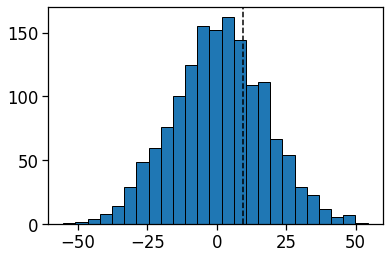

In [25]:
difference = results_P_noncarrier.params[1] - results_P_carrier.params[1]
permutationTest('P', difference)

0.4646666666666667

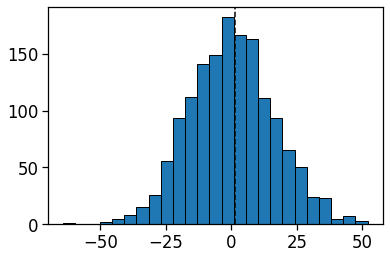

In [26]:
difference = results_Q_noncarrier.params[1] - results_Q_carrier.params[1]
permutationTest('Q', difference)

# VS Quartile Exploration
---

In [17]:
VS_data = new_data
VS_data.sort_values(by =['VS'], inplace = True)
VS_data['QuantileRank']= pd.qcut(data['VS'], q = 4, labels = False)

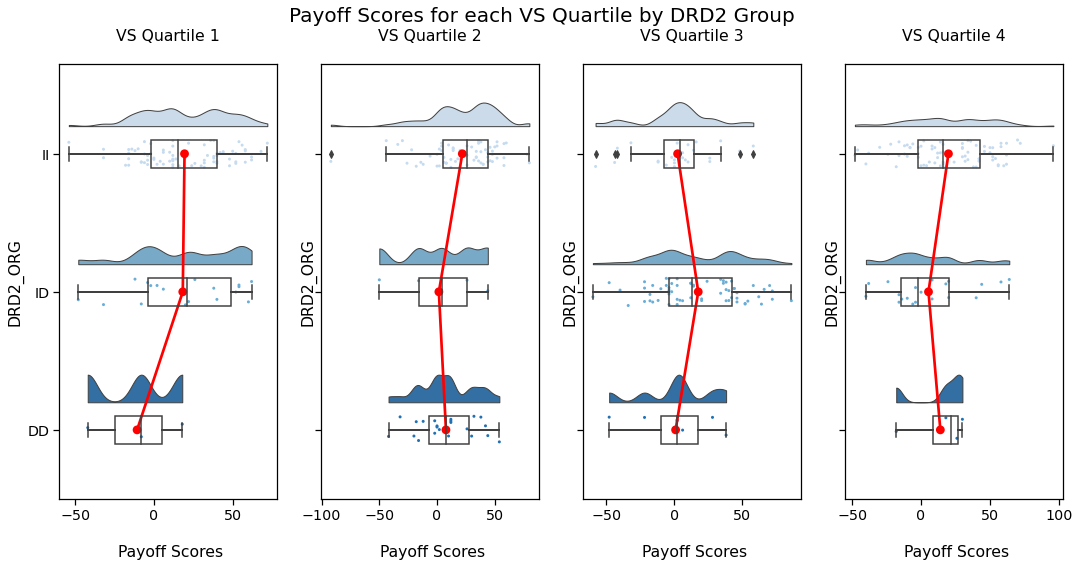

In [16]:
# Setting style of figures
sns.set_context("notebook", font_scale=1.3)

# Configuring 1st row of grid of plots
fig, axs = plt.subplots(1, 4,  figsize=(18,8), sharey=True)

axs = axs.ravel()

fig.suptitle('Payoff Scores for each VS Quartile by DRD2 Group \n', fontsize=20, ha='center')


for i in range(4):
    curr_ax = axs[i]
    VS_curr_data = VS_data[VS_data["QuantileRank"] == i]
    VS = pt.RainCloud(y='P', x='DRD2_ORG', orient='h',data=VS_curr_data, width_viol=.4, width_box=.2, 
                   palette='Blues', pointplot=True, ax=curr_ax)
    VS.set(xlabel='\n Payoff Scores')
    VS.set_title(f'\n VS Quartile {i+1} \n')

### VS Tertiles Percentage of Carriers

# Linear Regression Models for VS Tertiles
---

## P ~ DRD2 + VS +  DRD2*VS + AGE + female_1

VS Quartile 1

In [35]:
VS_data_Q1 = VS_data[VS_data["QuantileRank"] == 0]
results_P_VS_Q1 = smf.ols(formula='P ~ DRD2 + VS + DRD2*VS + AGE + female_1', data=VS_data_Q1).fit()
HTML(results_P_VS_Q1.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,29.4209,16.613,1.771,0.080,-3.524,62.365
DRD2,-15.7422,9.211,-1.709,0.090,-34.008,2.524
VS,18.0557,36.950,0.489,0.626,-55.218,91.330
DRD2:VS,-65.5015,67.655,-0.968,0.335,-199.665,68.662
AGE,-0.0235,0.402,-0.058,0.954,-0.821,0.774
female_1,-24.4401,5.953,-4.106,0.000,-36.244,-12.636


In [36]:
results_P_VS_Q1.params["DRD2"]

-15.742160244612457

VS Quartile 2

In [37]:
VS_data_Q2 = VS_data[VS_data["QuantileRank"] == 1]
results_P_VS_Q2 = smf.ols(formula='P ~ DRD2 + VS + DRD2*VS + AGE + female_1',data=VS_data_Q2).fit()
HTML(results_P_VS_Q2.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,25.6535,16.441,1.560,0.122,-6.953,58.260
DRD2,-0.5743,14.221,-0.040,0.968,-28.779,27.630
VS,-81.7551,115.662,-0.707,0.481,-311.143,147.632
DRD2:VS,-135.2193,220.398,-0.614,0.541,-572.327,301.888
AGE,0.1320,0.350,0.378,0.707,-0.561,0.826
female_1,-12.8277,5.059,-2.536,0.013,-22.861,-2.794


VS Quartile 3

In [38]:
VS_data_Q3 = VS_data[VS_data["QuantileRank"] == 2]
results_P_VS_Q3 = smf.ols(formula='P ~ DRD2 + VS + DRD2*VS + AGE + female_1',data=VS_data_Q3).fit()
HTML(results_P_VS_Q3.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,92.0947,23.978,3.841,0.000,44.541,139.649
DRD2,-48.1585,34.725,-1.387,0.168,-117.026,20.709
VS,-139.1167,114.685,-1.213,0.228,-366.567,88.333
DRD2:VS,224.7667,228.800,0.982,0.328,-229.004,678.538
AGE,-1.2485,0.383,-3.263,0.001,-2.007,-0.490
female_1,-0.8320,5.974,-0.139,0.890,-12.681,11.016


VS Quartile 4

In [39]:
VS_data_Q4 = VS_data[VS_data["QuantileRank"] == 3]
results_P_VS_Q4 = smf.ols(formula='P ~ DRD2 + VS + DRD2*VS + AGE + female_1',data=VS_data_Q4).fit()
HTML(results_P_VS_Q4.summary().tables[1].as_html())

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.3420,19.014,0.334,0.739,-31.362,44.047
DRD2,-15.4428,20.214,-0.764,0.447,-55.527,24.642
VS,5.8227,29.609,0.197,0.844,-52.892,64.538
DRD2:VS,19.7695,60.555,0.326,0.745,-100.314,139.853
AGE,0.3890,0.409,0.952,0.343,-0.421,1.200
female_1,-2.0307,5.490,-0.370,0.712,-12.918,8.857


## Linear Regression Plots for each Quartile by Group

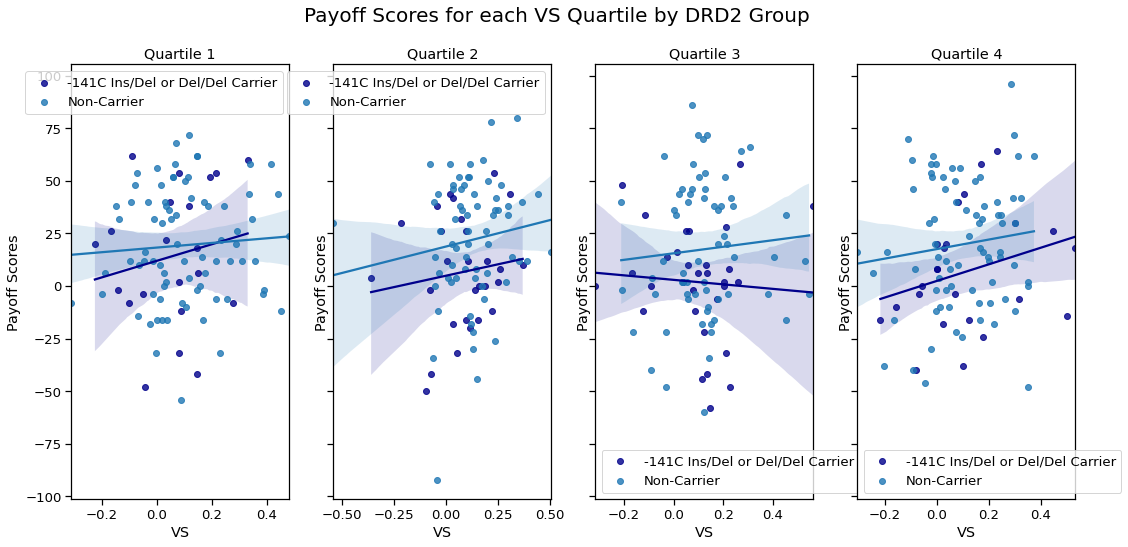

In [17]:
# Setting style of figures
sns.set_context("notebook", font_scale=1.2)

# Configuring 1st row of grid of plots

fig, axs = plt.subplots(1, 4,  figsize=(18,8), sharey=True)

axs = axs.ravel()

fig.suptitle('Payoff Scores for each VS Quartile by DRD2 Group', fontsize=20, ha='center')


for i in range(4):
    curr_ax = axs[i]
    curr_data = VS_data[VS_data["QuantileRank"] == i]
    curr_carrier_data = curr_data[curr_data["DRD2"] == 1]
    curr_noncarrier_data = curr_data[curr_data["DRD2"] == 0]
    
    scatter_P_carrier_1 = sns.regplot(x='VS', y='P', data=curr_carrier_data, label='-141C Ins/Del or Del/Del Carrier', 
                                  color="darkblue", ax=curr_ax).legend()
    scatter_P_noncarrier_1 = sns.regplot(x='VS', y='P', data=curr_noncarrier_data, label='Non-Carrier',
                                        ax=curr_ax).legend()
    curr_ax.set(xlabel='VS')
    curr_ax.set(ylabel='Payoff Scores')
    curr_ax.set_title(f'Quartile {i+1}')


## Bootstrap for DRD2 Coefficients
#### Defining the Bootstrap function for a boostrapped Linear Regression

In [20]:
# Bootstrap function for Bootstrapped data Linear Regression
def linreg(curr_array):
    
    curr_df = pd.DataFrame(curr_array, columns = ['P', 'VS', 'DRD2'])
    
    results = smf.ols(formula='P ~ DRD2 + VS + DRD2*VS', data=curr_df).fit()

    return results.params["DRD2"]

In [19]:
curr_boot = bootstrap(sample=curr_data[['P', 'VS', 'DRD2']], fn=linreg, size=10000)

#### Defining the Bootstrap loop for each VS Quartile

In [18]:
data_coef = {}
data_boot = pd.DataFrame(columns=['Qs','curr_boot'])

for i in range(4):
    curr_data = VS_data[VS_data["QuantileRank"] == i].reset_index()
    
    # DRD2 beta coefficient from Linear Regression calculation
    results = smf.ols(formula='P ~ DRD2 + VS + DRD2*VS', data=curr_data).fit()
    coef = results.params["DRD2"]
    
    data_coef[f'Q{i+1}'] = coef
    
    
    # Bootstrap calculations on mean VS per group
    curr_boot = bootstrap(sample=curr_data[['P', 'VS', 'DRD2']], fn=linreg, size=10000)
    
    for x in range(len(curr_boot)):
        df = pd.DataFrame([[f'Q{i+1}', curr_boot[x]]], columns=['Qs','curr_boot'])
        data_boot = data_boot.append(df)

## Bootstrapped $\beta_{DRD2}$ Coefficient Bar Plot

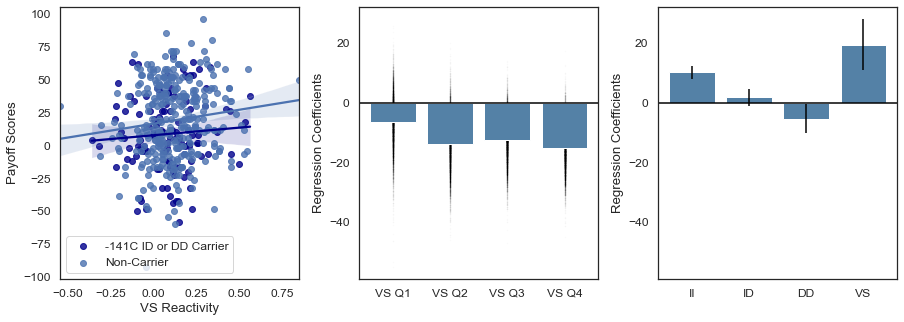

In [128]:
# Setting style of figures
sns.set_context("notebook", font_scale=1.1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.25)
fig.set_figheight(5)
fig.set_figwidth(15)


# P vs VS between DRD2 groups Scatter Plot
ax1 = fig.add_subplot(1, 3, 1)
scatter_P_low = sns.regplot(x='VS', y='P', data=carrier, label='-141C ID or DD Carrier', color="darkblue", ax=ax1).legend()
scatter_P_normal = sns.regplot(x='VS', y='P', data=noncarrier, label='Non-Carrier', ax=ax1).legend()
#plt.title('Payoff vs Ventral Striatal Reactivity between DRD2 groups \n', fontsize=10)
plt.ylabel('Payoff Scores')
plt.xlabel('VS Reactivity')


# Bootstrapped beta Coefficients for VS Quartiles
ax2 = fig.add_subplot(1, 3, 2, sharey=ax2)
Qs = list(data_coef.keys())
coefs = list(data_coef.values()) 
plot2 = sns.barplot(x=Qs, y=coefs, color="steelblue")
plt.scatter('Qs', 'curr_boot', alpha=0.04, data=data_boot, edgecolor="black", s=.05)
plt.axhline(0, color = "black")
#fig.suptitle('Bootstrapped $\u03B2_{DRD2}$ Coefficient for each VS Quartile\n', fontsize=10, ha='center')
#plt.xlabel(' \n VS Quartiles')
#plt.ylabel('$\u03B2_{DRD2}$ Coefficients \n')
plt.ylabel('Regression Coefficients')
plot2.set_xticklabels(["VS Q1", "VS Q2", "VS Q3", "VS Q4"])


beta_df = pd.DataFrame({"coef_vals": new_results_P_main_effects_coded.params[1:]})
ci_df = new_results_P_main_effects_coded.conf_int(cols=None)[1:]
se_df = pd.DataFrame({"se_vals":new_results_P_main_effects_coded.bse[1:]})
beta_df = pd.merge(beta_df, ci_df, left_index=True, right_index=True, how='outer')
beta_df = pd.merge(beta_df, se_df, left_index=True, right_index=True, how='outer')
beta_df = beta_df.reset_index()
beta_df = beta_df.rename(columns={"index":"Betas", "coef_vals":"Coef Vals", 0:"0.025 CI", 1:"0.975 CI", "se_vals": "Std. Error"})


ax3 = fig.add_subplot(1, 3, 3, sharey=ax2)
def change_width(ax3, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

plot3 = sns.barplot(x = "Betas", 
                    y = "Coef Vals",
                    data = beta_df,
                    color="steelblue", ax=ax3)


# include these to use confidence intervals as yerr = [lower, upper]
lower = beta_df["Coef Vals"] - beta_df["0.025 CI"]
upper = beta_df["0.975 CI"] - beta_df["Coef Vals"]

plot3.errorbar(x = beta_df["Betas"], 
               y = beta_df["Coef Vals"],
               yerr = beta_df["Std. Error"], # using Standard Error
               fmt = 'none', c = 'black')

plot3.axhline(0, color = "black")
plot3.set(ylabel = "Regression Coefficients", xlabel = "")
plot3.set_xticklabels(["II", "ID", "DD", "VS"])
change_width(plot1, 0.85)





plt.show()

fig.savefig('Tables&Figures/Scatter&CoefBarPlots.png', bbox_inches='tight')



---

# <div align="center">Q-Agent on IGT 
    
---

Defines the reinforcement learning Q-Learning Agent on the Iowa Gambling Task and its learning paraments
* r = reward
* RPE = r - Q(s,a)
* 𝛼Gain = Learning Rate when RPE > 0
* 𝛼Loss = Learning Rate when RPE ≤ 0
* 𝜷 = Inverse Temperature (degree of randomness)
* 𝜸 = Reward strength (representative of dopamine reactivity)

In [46]:
from __future__ import division
import numpy as np
from numpy import array
from numpy.random import sample as rs
from numpy import newaxis as na
import pandas as pd
from pandas import DataFrame
from scipy.stats import sem
import seaborn as sns
import string
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import csv
from __future__ import division
from future.utils import listvalues
from scipy.stats.stats import sem
import ptitprince as pt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Update Q (State, Action values)
#### Defines the function that first calculates and updates the Q values of the Q-agent

<div align="center"> If $r - Q(s, a) > 0:$
<div align="center"> $\alpha = \alpha_{Gain}$ 

<div align="center"> Else: 
<div align="center"> $\alpha = \alpha_{Loss}$  

$$Update(Q): Q(s,a) += \alpha(\gamma r + max(Q(s')) - Q(s,a))$$ 
 				
                
$$Update(Q): Q(s,a) += \alpha_{Loss}(\gamma p + max(Q(s')) - Q(s,a))$$ 

In [47]:
def update_Qi(Qval, reward, alpha, gamma):
    """ update q-value of selected action, given reward and alpha
    alpha is changed depending on RPE (reward prediction error)
    (whether (reward - Qval) >= 0, reward gains or (reward - Qval) < 0, reward loss)
    """
    return Qval + (alpha * ((gamma*reward) - Qval))

## P (Selection Probabilities)
#### Defines the function that updates the P values of the Q-Agent

$$Update(P)= \frac {e^{\beta Q_i}}{\sum e^{\beta * (Q_{vector} - max(Q_{vector}))}} $$


* "...where T is a positive parameter called the temperature. High temperatures cause the actions to be all (nearly) equiprobable. Low temperatures cause a greater difference in selection probability for actions that differ in their value estimates."

inverse temperature = beta = greediness
* As temperature increases, beta decreases & greediness DECREASES (explorative)
* As temperature decreases, beta increases & greediness INCREASES (exploitative)

In [48]:
def update_Pall(Qvector, beta):
    """ update vector of action selection probabilities given
    associated q-values
    """ 
    Zvector = Qvector - max(Qvector)
    denom = np.sum(np.exp(beta * Zvector))
        
    resulting_pdata = np.array([np.exp(beta*Q_i) / denom for Q_i in Zvector])
    
    return resulting_pdata

## Iowa Gambling Task 
#### Defines the Iowa Gambling Task (IGT) played by the Q-Agent
#### IGT game design 
100 Trials total (from Bechara, 1997)

|  | Deck A | Deck B | Deck C | Deck D |
| -------- | --- | --- | --- | --- | --- |
| p(gains) | 0.5 | 0.9 | 0.5 | 0.9 |
| g(losses) | 0.5 | 0.1 | 0.5 | 0.1 |
| avg gains | \$100 | \$100 | \$50 | \$50 |
| avg losses | -\$250 | -\$1250 | -\$50 | -\$250 |
| overall gains | -\$75 | -\$75 | \$0 | \$20 |


#### Alternative designs
- switch overall gains of C & D so that C has positive gains and keeps p(gains)=0.5, 
	and D has $0 gains and keeps p(gains)=0.9
	- may be interesting to see the effect of alpha on frequency of gains

In [49]:
class IowaGamblingTask(object):
    """ defines a multi-armed bandit task

    ::Arguments::
        preward (list): 1xN vector of reward probabilities for each of N bandits
        rvalues (list): 1xN vector of payout values for each of N bandits
    """    
            
    def __init__(self):
                
        self.all_cards = pd.read_csv('IGTCards.csv')
        self.deck_gains = self.all_cards.sum()
        self.deck_counters = np.zeros(len(self.all_cards.columns), dtype = int)
        


    def get_feedback(self, action_ix):
    
        if self.deck_counters[action_ix] == 49:
            self.deck_counters[action_ix] = 0
        
        else:    
            self.deck_counters[action_ix] += 1
        
        curr_counter = self.deck_counters[action_ix]
        
        feedback = self.all_cards.iloc[curr_counter, action_ix]
        
        return feedback

## Q-Agent
#### Defines the reinforcement learning Q-Learning Agent on the IGT and its learning paraments

* r = reward
* RPE = r - Q(s,a)
* 𝛼Gain = Learning Rate when RPE > 0
* 𝛼Loss = Learning Rate when RPE ≤ 0
* 𝜷 = Inverse Temperature (degree of randomness)
* 𝜸 = Reward strength (representative of dopamine reactivity)

In [50]:
class Qagent(object):

    """ defines the learning parameters of single q-learning agent
    in the Iowa Gambling Task

    ::Arguments::
        alpha_g (float): learning rate for gains
        alpha_l (float): learning rate for losses
        beta (float): inverse temperature parameter
        gamma (float): sensitivity to reward or losses
        preward (list): 1xN vector of reward probaiblities for each of N decks
        rvalues (list): 1xN vector of payout values for each of N decks
                        IF rvalues is None, all values set to 1
        pvalues (list): 1xN vector of punishment values for each of N decks
                        IF rvalues is None, all values set to 1

    """

    def __init__(self, alpha_g,
                       alpha_l, 
                       beta, 
                       gamma, 
                       decks=['A', 'B', 'C', 'D']):

        if decks is None:
            decks = ['A', 'B', 'C', 'D']

        # calling IowaGamblingTask() function with arguments in Qagent() object
        self.IGT = IowaGamblingTask()
        
        self.alpha_data = []
        
        self.rpe_data = []
        
        # setting parameters passed through Qagent() as arguments
        self.set_params(alpha_g=alpha_g, alpha_l=alpha_l, beta=beta, gamma=gamma, decks=decks)


    def set_params(self, **kwargs):
        
        """ update parameters of q-learning agent:
                alpha_g = learning rate for gains
                alpha_l = learning rate for losses
                beta = inv. temperature,
                gamma = representative of dopamine release
                epsilon = exploration constant to randomize decisions
                preward = probability of reward, p(reward)
                rvalues = reward amounts  (+$)
                pvalues = punishment amounts (-$)
        """

        kw_keys = list(kwargs)

        if 'alpha_g' in kw_keys:
            self.alpha_g = kwargs['alpha_g']

        if 'alpha_l' in kw_keys:
            self.alpha_l = kwargs['alpha_l']

        if 'beta' in kw_keys:
            self.beta = kwargs['beta']

        if 'gamma' in kw_keys:
            self.gamma = kwargs['gamma']
        
        if 'decks' in kw_keys:
            self.decks = kwargs['decks']

        # number of choices/options
        self.nact = len(self.decks)

        # actions limited to number of choices/options
        self.actions = np.arange(self.nact)


    def play_IGT(self, ntrials=100, get_output=True):
        
        """ simulates agent performance on a multi-armed bandit task

        ::Arguments::
            ntrials (int): number of trials to play bandits
            get_output (bool): returns output DF if True (default)

        ::Returns::
            DataFrame (Ntrials x Nbandits) with trialwise Q and P
            values for each bandit
        """
        
        pdata = np.zeros((ntrials + 1, self.nact))
        
        pdata[0, :] = np.array([1/self.nact]*self.nact)
        
        qdata = np.zeros_like(pdata)
        self.choices = []
        self.feedback = []

        for t in range(ntrials):

            # select bandit arm (action)            
            act_i = np.random.choice(self.actions, p=pdata[t, :])
            
            # observe feedback
            r = self.IGT.get_feedback(act_i)

            # update value of selected action depending on whether it is a gain or loss
            rpe = r - qdata[t, act_i]
            if rpe >= 0:
                alpha = self.alpha_g
            if rpe < 0:
                alpha = self.alpha_l
            
            qdata[t+1, act_i] = update_Qi(qdata[t, act_i], r, alpha, self.gamma)

            # broadcast old q-values for unchosen actions
            for act_j in self.actions[np.where(self.actions!=act_i)]:
                qdata[t+1, act_j] = qdata[t, act_j]

            # update action selection probabilities and store data
            pdata[t+1, :] = update_Pall(qdata[t+1, :], self.beta)
            
            self.choices.append(act_i)
            self.feedback.append(r)
            self.rpe_data.append(rpe)
            self.alpha_data.append(alpha)
        
        self.pdata = pdata[1:, :]
        self.qdata = qdata[1:, :]
        self.make_output_df()

        if get_output:
            return self.data.copy()


    def make_output_df(self):
        """ generate output dataframe with trialwise Q and P measures for each bandit,
        as well as choice selection, and feedback
        """
        df = pd.concat([pd.DataFrame(dat) for dat in [self.qdata, self.pdata]], axis=1)
        columns = np.hstack(([['{}{}'.format(x, c) for c in self.actions] for x in ['q', 'p']]))
        df.columns = columns
        df.insert(0, 'trial', np.arange(1, df.shape[0]+1))
        df['choice'] = self.choices
        df['feedback'] = self.feedback
        
        # replace 3 with self.IGT.deck_gains.values.argmax()
        df['optimal'] = np.where(df['choice']==2, 1, 0)
        df['RPE'] = self.rpe_data
        df['alpha'] = self.alpha_data
        df.insert(0, 'agent', 1)
        self.data = df.copy()


    def simulate_multiple(self, nsims=10, ntrials=1000):
        """ simulates multiple identical agents on multi-armed bandit task
        """
        dflist = []
        for i in range(nsims):
            data_i = self.play_IGT(ntrials=ntrials, get_output=True)
            data_i['agent'] += i
            dflist.append(data_i)
        return pd.concat(dflist)

## Q-Agent Trial Analysis

In [51]:
def get_optimal_auc(df, nblocks=25, verbose=False, as_percent=True):
    xdf = blockify_trials(df, nblocks=nblocks)
    muOptDF = xdf.groupby(['agent', 'block']).mean().reset_index()
    auc = pd.pivot_table(muOptDF, values='optimal', index='block').values.sum()
    if as_percent:
        auc = (auc / nblocks) * 100
        print("Optimal Choice (Deck 3) chosen {:.2f}% of time".format(auc))
    if verbose:
        print("Optimal Choice (Deck 3) chosen {:.2f} times".format(auc))

    return auc

def analyze_bandits(df, nblocks=25, get_err=False):
    xdf = blockify_trials(df, nblocks=nblocks)
    optDF = xdf.groupby(['agent', 'block']).mean().reset_index()
    muOpt = pd.pivot_table(optDF, values='optimal', index='block').values
    muOpt = np.hstack(muOpt)
    if get_err:
        errOpt = pd.pivot_table(optDF, values='optimal', index='block', aggfunc=sem).values*1.96
        errOpt = np.hstack(errOpt)
    else:
        errOpt = np.zeros_like(muOpt)
    return muOpt, errOpt

def blockify_trials(data, nblocks=5, conds=None, groups=['agent']):

    datadf = data.copy()
    if conds is not None:
        if type(conds) is str:
            conds = [conds]
        groups = groups + conds

    idxdflist = []
    for dfinfo, idxdf in datadf.groupby(groups):
        ixblocks = np.array_split(idxdf.trial.values, nblocks)
        blocks = np.hstack([[i+1]*arr.size for i, arr in enumerate(ixblocks)])
        idxdf = idxdf.copy()
        colname = 'block'
        idxdf[colname] = blocks
        idxdflist.append(idxdf)

    return pd.concat(idxdflist)


## Q-Agent Trial IGT Scores Calculation 
* Payoff
* Sensitivity to Frequency of Rewards

In [52]:
def get_IGT_scores(data):
    
    # initializing a choice dictionary with the default of 0 times chosen
    choice_dict = {0: 0, 1:0, 2:0, 3:0}
    
    # updating the choice dictionary with the deck choices made
    choices_made = data['choice'].value_counts(sort = False).to_dict()
    
    for key, value in choices_made.items():
        choice_dict[key] = value

    A, B, C, D = choice_dict.get(0), choice_dict.get(1), choice_dict.get(2), choice_dict.get(3)
    
    # Payoff (P)
    payoff = (C + D) - (A + B)
    
    # Sensitivity to frequency of gains (Q)
    sensitivity = (B + D) - (A + C)
    
    return pd.Series((payoff, sensitivity))

## Q-Agent Trial Run Plots
* Choice Raster Plot
* Q(Decks) Line Plot
* P(Decks) Line Plot
* % Optimal Deck (C) Chosen Line Area Plot

In [248]:
def plot_qlearning(data, nblocks=25, analyze=True):

    if analyze:
        auc = get_optimal_auc(data, nblocks, as_percent=True)

    sns.set(style='white', font_scale=1.3)
    clrs = ['#3778bf', '#feb308', '#9b59b6', '#2ecc71', '#e74c3c',
            '#3498db', '#fd7f23', '#694098', '#319455', '#f266db',
            '#13579d', '#fa8d67'  '#a38ff1'  '#3caca4', '#c24f54']

    f, ([[ax0, ax1], [ax2, ax3]]) = plt.subplots(2, 2, figsize=(15,10))
    df = data.copy()
    nactions = int(df.columns[-6].split('p')[-1])+1
    actions = np.arange(nactions)

    mudf = df.groupby('trial').mean().reset_index()
    errdf = df.groupby('trial').sem().reset_index()*1.96
    x = mudf.trial.values
    

    plot_err = True
    if np.isnan(errdf.loc[1, 'q0']):
        plot_err = False

    x3 = np.arange(1, nblocks+1)
    chance = 1/nactions
    mu3, err3 = analyze_bandits(df, nblocks=nblocks, get_err=plot_err)
    ax3.plot(x3, mu3, color='k')
    ax3.hlines(chance, 1, x3[-1], color='k', linestyles='--', label='chance')
    

    for i, act in enumerate(actions):
        muQ = mudf['q{}'.format(act)].values
        muP = mudf['p{}'.format(act)].values

        choices = [data[data["choice"] == i]["trial"].values]
        ax0.eventplot(positions=choices, lineoffsets=[i+1], 
                      orientation='horizontal', color=clrs[i])
        letters = ["A", "B", "C", "D"]
        ax1.plot(x, muQ, label='$deck_{}$'.format(letters[i]), color=clrs[i])
        ax2.plot(x, muP, color=clrs[i])

        
        
        if plot_err:
            errQ = errdf['q{}'.format(act)].values
            errP = errdf['p{}'.format(act)].values
            ax1.fill_between(x, muQ-errQ, muQ+errQ, color=clrs[i], alpha=.2)
            ax2.fill_between(x, muP-errP, muP+errP, color=clrs[i], alpha=.2)
            if i==0:
                ax3.fill_between(x3, mu3-err3, mu3+err3, color='k', alpha=.15)
        else:
            ychance = np.ones(mu3.size) * chance
            mu3A = np.copy(mu3)
            mu3B = np.copy(mu3)
            mu3A[np.where(mu3<=chance)] = chance
            mu3B[np.where(mu3>=chance)] = chance
            ax3.fill_between(x3, ychance, mu3A, color='#2ecc71', alpha=.15)
            ax3.fill_between(x3, ychance, mu3B, color='#e74c3c', alpha=.15)

    ax0.set_yticks([1,2,3,4], minor=False)
    ax0.set_yticklabels(["A", "B", "C", "D"], fontdict=None, minor=False)
    ax0.set_ylabel('Deck Choices')

    
    ax1.legend(bbox_to_anchor=(-1.5,0.3), loc="lower right")
    ax1.set_ylabel('$Q(Deck)$')
    ax1.set_title('Value')

    ax2.set_ylabel('$P(Deck)$')
    ax2.set_ylim(0,1)
    ax2.set_title('Softmax Prob.')

    ax3.set_ylim(0,1)
    ax3.set_ylabel('% Optimal Deck C')
    ax3.set_xticks([1, nblocks+1])
    ax3.set_xticklabels([1, df.trial.max()])
    ax3.legend(loc="upper right")

    for ax in f.axes:
        ax.set_xlabel('Trials')
    plt.tight_layout()
    sns.despine()
    
    plt.savefig('Tables&Figures/QAgentTrialRunLegend.png', bbox_inches='tight')

## Q-Agent Trial Run
Example
* alpha gain = 1.5
* alpha loss = 1.4
* beta = 0.006
* gamma = 1

Optimal Choice (Deck 3) chosen 62.00% of time


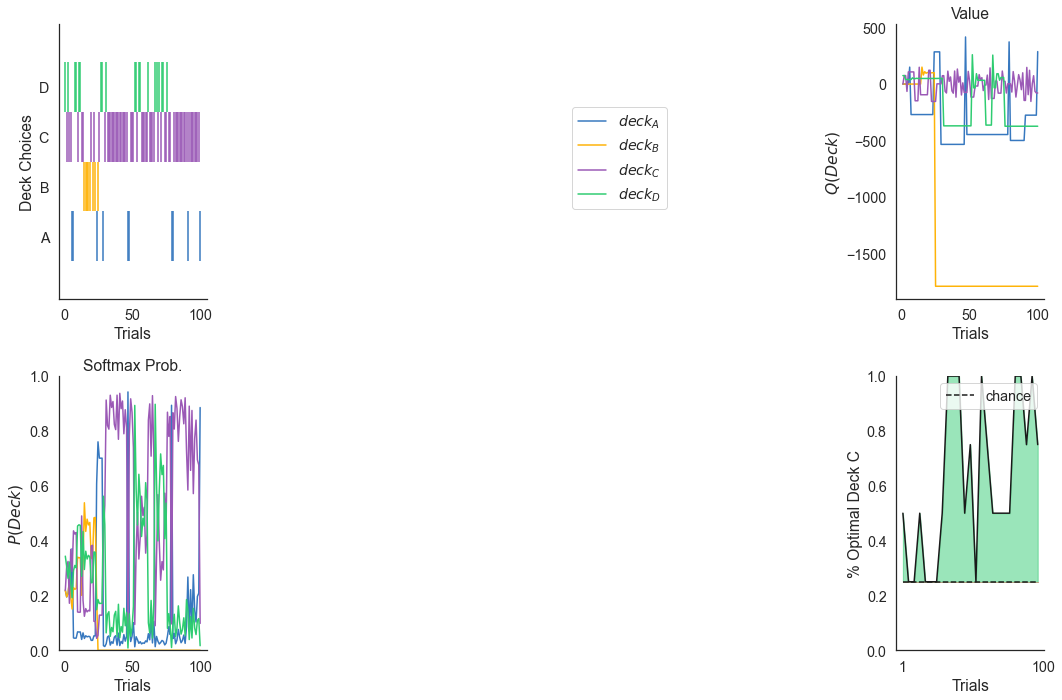

In [249]:
# Qagent(alpha_g=alpha_g, alpha_l=alpha_l, beta=beta, gamma=gamma)
agent = Qagent(alpha_g=1.5, alpha_l=1.4, beta=0.006, gamma=1)

# play 800 trials of multi-armed bandit task
data = agent.play_IGT(ntrials=100, get_output=True)

# plot Q-values and softmax selection prob. for each bandit
plot_qlearning(data)



In [58]:
def plot_heatmaps(data):
    
    plt.figure(figsize=(14, 11))
    heatmap_df = pd.pivot(data, index = "Alpha Loss", columns = "Alpha Gain", values = "Payoff").astype('float')
    
    
    sns.heatmap(heatmap_df, square = True, cmap='RdBu_r', vmin=-100, vmax=100).invert_yaxis()
    plt.plot([0, 20], [0, 20])

In [59]:
def agent_df(agmax, almax, astep, given_beta, given_gamma):
    df_columns = np.array(['Alpha Gain', 'Alpha Loss', 'Beta', 'Gamma', 'Payoff', 'Sensitivity'])
    df = pd.DataFrame(dtype=float, columns=df_columns)
    
    for cycle in np.arange(0, 50, 1): 
        
        #alpha gains should only be positive, 0 to 1 for example
        for alpha_g in np.arange(0, agmax, astep):

            #alpha loss should only be positive, 0 to 1 for example
            for alpha_l in np.arange(0, almax, astep):

                beta = given_beta
                gamma = given_gamma
                alpha_g, alpha_l, beta = np.round(alpha_g, 1), np.round(alpha_l, 3), np.round(beta, 3)
                agent = Qagent(alpha_g=alpha_g, alpha_l=alpha_l, beta=beta, gamma=gamma)
                data = agent.play_IGT(ntrials=100, get_output=True)
                scores = get_IGT_scores(data)
                payoff, sensitivity = scores.iloc[0], scores.iloc[1]
                trial_df = pd.DataFrame([[alpha_g, alpha_l, beta, gamma, payoff, sensitivity]], columns = df_columns)
                df = df.append(trial_df)
                df.reset_index(drop=True, inplace=True)

    return df

#### Q-Agent Perfomance Parameter Analysis for the following ranges:
* $\beta$ = 0.003 - 0.006
* $\alpha_{Gains}$ = 0 - 2
* $\alpha_{Loss}$ = 0 - 2
* $\gamma$ = 0.5, 1, 2

In [60]:
# agent_df(agmax, almax, astep, given_beta, given_gamma)
mydf1 = agent_df(2, 2, .1, .003, 0.5)
mydf2 = agent_df(2, 2, .1, .003, 1)
mydf3 = agent_df(2, 2, .1, .003, 1)
mydf4 = agent_df(2, 2, .1, .006, 0.5)
mydf5 = agent_df(2, 2, .1, .006, 1)
mydf6 = agent_df(2, 2, .1, .006, 2)

In [227]:
# Saving Q-Agent data for Parameter analysis in a List of Q-Agent Dataframes
mydfs_dup = [mydf1, mydf2, mydf3, mydf4, mydf5, mydf6]
mydfs = []

for df in mydfs_dup:
    df = df.groupby(['Alpha Gain', 'Alpha Loss'])[['Beta', 'Gamma','Payoff']].mean().reset_index()
    mydfs.append(df)

In [228]:
#change or comment out if you want to plot all dfs
mydfs = mydfs[3:]

## Heat Maps
### Defines Heat Maps of Payoff Scores for $\alpha_{Gains}$ and $\alpha_{Loss}$ with Parameter Analysis Q-Agents
* $\beta$ = 0.003 - 0.006
* $\alpha_{Gains}$ = 0 - 2
* $\alpha_{Loss}$ = 0 - 2
* $\gamma$ = 0.5, 1, 2

/Users/cristinabanuelos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


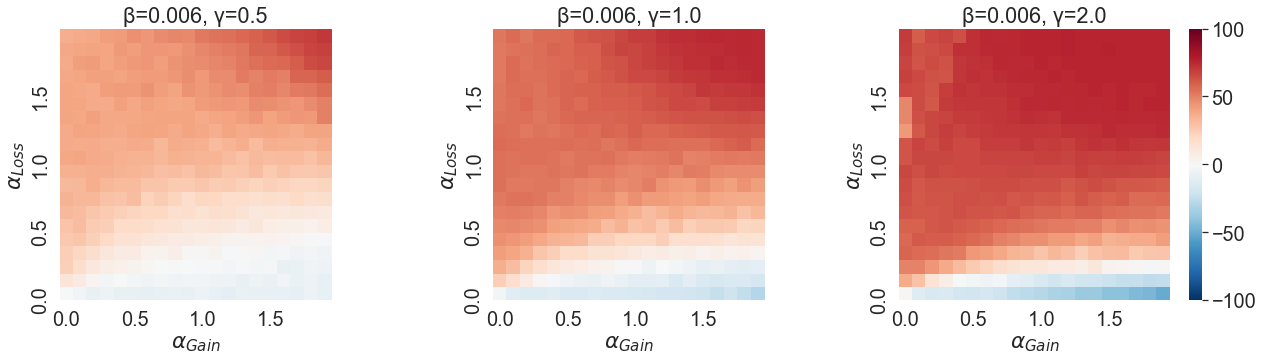

In [245]:
sns.set_theme()
sns.set_context("notebook", font_scale=1.8)

grid_kws = {"hspace": 0, "wspace": 0.2}
fig, axs = plt.subplots(1,3, figsize=(22,5), gridspec_kw=grid_kws)
axs = axs.ravel()


for i in range(len(mydfs)):
    
    df = mydfs[i]
    curr_ax = axs[i]
    if i == 2 or i == 5: mybool = True
    else: mybool = False

    heatmap_df = pd.pivot(df, index = "Alpha Loss", columns = "Alpha Gain", values = "Payoff").astype('float')
    myplot = sns.heatmap(heatmap_df, square = True, cmap='RdBu_r', vmin=-100, vmax=100, xticklabels=5, 
                yticklabels=5, cbar=mybool, ax=curr_ax).invert_yaxis()
    
    beta = round(df["Beta"][0], 3)
    gamma = round(df["Gamma"][0], 3)
    curr_ax.set_title(f"\u03B2={beta}, \u03B3={gamma}")
    curr_ax.set(ylabel='$\u03B1_{Loss}$')
    curr_ax.set(xlabel='$\u03B1_{Gain}$')
    
plt.tight_layout()

fig.savefig('Tables&Figures/QAgentHeatMaps.png', bbox_inches='tight')

## Scatter Plots
#### Defines Scatter Plots of Ratio of $\alpha_{Loss}$ to $\alpha_{Gains}$ and Payoff Scores

* Change plot_curves  to True to plot the polynomial curves of each linear regression with degrees 2-9

In [230]:
mydfs

[     Alpha Gain  Alpha Loss   Beta  Gamma  Payoff     Ratio
 0           0.0         0.0  0.006    0.5   -0.60       NaN
 1           0.0         0.1  0.006    0.5   12.84       inf
 2           0.0         0.2  0.006    0.5   23.44       inf
 3           0.0         0.3  0.006    0.5   24.84       inf
 4           0.0         0.4  0.006    0.5   26.72       inf
 ..          ...         ...    ...    ...     ...       ...
 395         1.9         1.5  0.006    0.5   55.84  0.789474
 396         1.9         1.6  0.006    0.5   60.84  0.842105
 397         1.9         1.7  0.006    0.5   67.16  0.894737
 398         1.9         1.8  0.006    0.5   68.60  0.947368
 399         1.9         1.9  0.006    0.5   71.00  1.000000
 
 [400 rows x 6 columns],
      Alpha Gain  Alpha Loss   Beta  Gamma  Payoff     Ratio
 0           0.0         0.0  0.006    1.0   -3.04       NaN
 1           0.0         0.1  0.006    1.0   24.44       inf
 2           0.0         0.2  0.006    1.0   36.40       i

/Users/cristinabanuelos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x288 with 0 Axes>

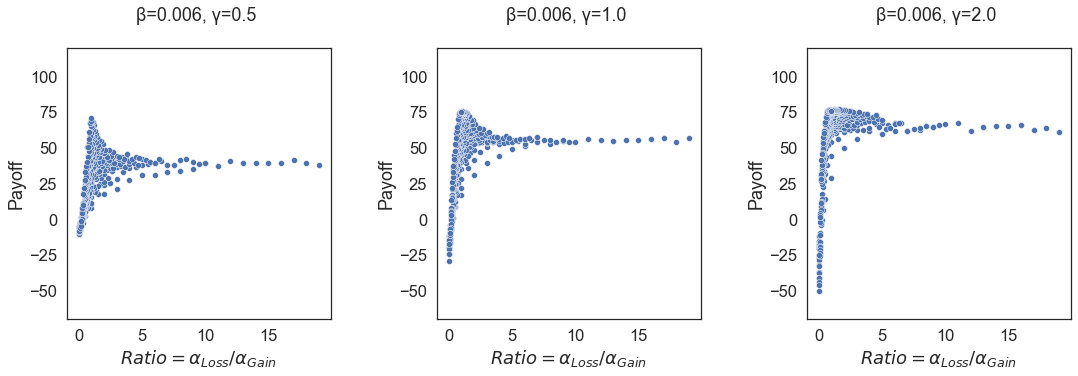

In [238]:
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5)

plt.figure()
grid_kws = {"hspace": .4, "wspace": 0.4}
fig, axs = plt.subplots(1,3, figsize=(18,5), gridspec_kw=grid_kws)

axs = axs.ravel()

plot_curves = False

for i in range(len(mydfs)):
    
    df = mydfs[i]
    curr_ax = axs[i]
    
    df["Ratio"] = df["Alpha Loss"]/df["Alpha Gain"]
    df = df.replace([np.inf, -np.inf], np.nan).dropna().reset_index()

    scatter = sns.scatterplot(data=df, x="Ratio", y="Payoff", ax=curr_ax)
    
    beta = round(df["Beta"][0], 3)
    gamma = df["Gamma"][0]
    
    
    curr_ax.set_title(f"\u03B2={beta}, \u03B3={gamma} \n")
    curr_ax.set(xlabel='$Ratio = \u03B1_{Loss}/\u03B1_{Gain}$', ylim=(-70, 120))
    
    ratios = df["Ratio"].to_numpy()
    payoff = df["Payoff"].to_numpy()
    
    colors = ['tab:pink','tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:purple', 'tab:brown']
    
    if plot_curves == True:
        for deg in range(2, 10):
            curr_color = colors[deg - 2]

            x_poly = PolynomialFeatures(degree=deg).fit_transform(ratios.reshape(-1, 1))
            lin_reg = LinearRegression()

            lin_reg.fit(x_poly, payoff.reshape(-1, 1))
            y_pred = lin_reg.predict(x_poly)

            polydf = pd.DataFrame({'Ratios': ratios, 'Y Predicted': np.concatenate(y_pred)}, 
                                  columns=['Ratios', 'Y Predicted'])
            polydf = polydf.sort_values("Ratios")

            curr_ax.plot(polydf['Ratios'], polydf['Y Predicted'], color=curr_color, label=f'degree={deg}')
        

#axs[len(mydfs)-1].legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.tight_layout()

fig.savefig('Tables&Figures/QAgentScatterplots.png', bbox_inches='tight')

## Polynomial Linear Regression Model Fits 
#### Defines the Model Fits for Payoff vs 𝜶-Ratio (𝜶Loss/𝜶Gain)

In [64]:
model_params = []

for i in range(3, 6):
    df = mydfs[i]
    df["Ratio"] = df["Alpha Loss"]/df["Alpha Gain"]
    df = df.replace([np.inf, -np.inf], np.nan).dropna().reset_index()
    
    ratios = df["Ratio"].to_numpy()
    payoff = df["Payoff"].to_numpy()
    
    beta = round(df["Beta"][0], 3)
    gamma = df["Gamma"][0]

    for deg in range(2, 10):
        x_poly = PolynomialFeatures(degree=deg).fit_transform(ratios.reshape(-1, 1))
        model = sm.OLS(payoff, x_poly).fit()
        #lin_reg = LinearRegression()
        #lin_reg.fit(x_poly, payoff)
        
        if len(model.params) >= 4:
            model_params.append([f"{deg}", round(model.aic), 
                                           round(model.bic), 
                                           round(model.params[1], 3), 
                                           round(model.params[2], 3), 
                                           round(model.params[3], 3)])
        else:
            model_params.append([f"{deg}", round(model.aic), 
                                           round(model.bic), 
                                           round(model.params[1], 3), 
                                           round(model.params[2], 3), 
                                           "None"])

## AIC, BIC, and $\beta's$ 1, 2, and 3 for Model Fits

<Figure size 432x288 with 0 Axes>

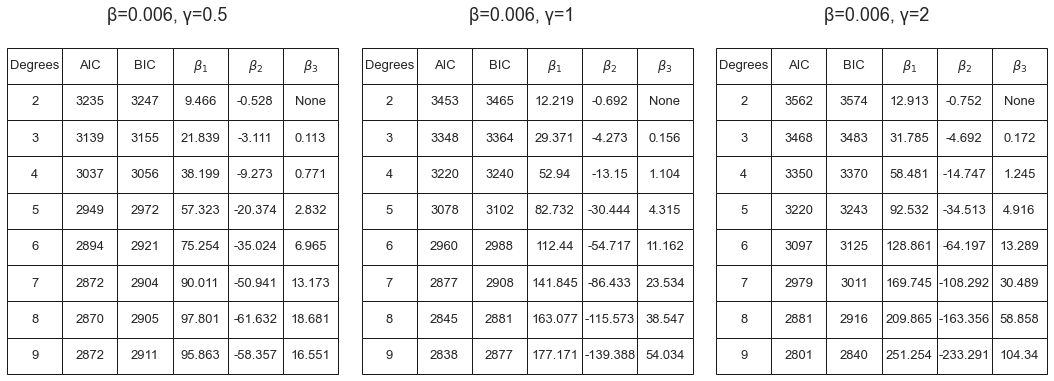

In [65]:
sns.set_theme()
sns.set_context("notebook")

plt.figure()
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs = axs.ravel()

cols = ["Degrees", "AIC", "BIC", "$\u03B2_{1}$", "$\u03B2_{2}$", "$\u03B2_{3}$"]

for i in range(3):
    curr_ax = axs[i]
    curr_ax.axis('off')
    stop = 8 + (i*8)
    start = stop - 8
    gammas = [0.5, 1, 2]
    tab = curr_ax.table(model_params[start:stop], colLabels=cols ,bbox=[0, 0, 1.12, 1], cellLoc = 'center')
    curr_ax.set_title(f"      \u03B2={beta}, \u03B3={gammas[i]} \n", fontsize=18)
    tab.auto_set_font_size(False)
    tab.set_fontsize(13)
    
fig.savefig('Tables&Figures/QAgentModelFits.png')